# XCL1 Chaotrope titration T ramps with XCL1
<p>This is an exploratory notebook to examine the data from the Prometheus.</p></br>
<p>The data are regualr temperature denaturation curves, but with increasing amount of either Urea or Guanidine.</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import os
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
import scipy.stats
from scipy.stats import linregress
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'figure.autolayout': True})
%matplotlib inline  
%config Completer.use_jedi = False

In [2]:
#Change dirctory location to where the data is stored
os.chdir('/Users/djensen/Documents/XCL1/XCL1_chemical_denaturation')

# Here is a list of all the samples in this experiment

In [3]:
overview = pd.read_excel('./20210518/20210518_XCL1_Chaotrope_Tm.xlsx', sheet_name = 'Overview', header=0)
#overview
overview.iloc[np.arange(0, 34, 1).tolist(),[0, 1, 2, 3, 4, 5, 6, 7, 8]]

,Capillary,Sample ID,[Protein],Chaotrope,[Chaotrope],Excitation Power,Start Temperature,End Temperature,Temperature Slope
0,1,XCL1,0.1mg/mL,Guanidine,7.5,0.8,15,95,0.5
1,2,XCL1,0.1mg/mL,Guanidine,7.0,0.8,15,95,0.5
2,3,XCL1,0.1mg/mL,Guanidine,6.5,0.8,15,95,0.5
3,4,XCL1,0.1mg/mL,Guanidine,6.0,0.8,15,95,0.5
4,5,XCL1,0.1mg/mL,Guanidine,5.5,0.8,15,95,0.5
5,6,XCL1,0.1mg/mL,Guanidine,5.0,0.8,15,95,0.5
6,7,XCL1,0.1mg/mL,Guanidine,4.5,0.8,15,95,0.5
7,8,XCL1,0.1mg/mL,Guanidine,4.0,0.8,15,95,0.5
8,9,XCL1,0.1mg/mL,Guanidine,3.5,0.8,15,95,0.5
9,10,XCL1,0.1mg/mL,Guanidine,3.0,0.8,15,95,0.5


In [4]:
capillary = pd.read_excel('./20210518/20210518_XCL1_Chaotrope_Tm.xlsx', sheet_name = '330nm')
cols = capillary.columns.to_list()
newcols = []
for item in cols:
    newcols.append('c' + str(item))
newcols[0] = 'Time'
newcols[1] = 'Temp'
A330 = pd.read_excel('./20210518/20210518_XCL1_Chaotrope_Tm.xlsx', sheet_name = '330nm', names=newcols, skiprows=5)
A350 = pd.read_excel('./20210518/20210518_XCL1_Chaotrope_Tm.xlsx', sheet_name = '350nm', names=newcols, skiprows=5)
Ratio = pd.read_excel('./20210518/20210518_XCL1_Chaotrope_Tm.xlsx', sheet_name = 'Ratio', names=newcols, skiprows=5)
dRatio = pd.read_excel('./20210518/20210518_XCL1_Chaotrope_Tm.xlsx', sheet_name = 'Ratio (1st deriv.)', names=newcols, skiprows=5)

# First, we will plot out the GnHCl unfolding temperature experiments
### I want to point out 2 things
1. There is not more change in the curves after 5M GnHCl indicatiing the protein is unfolded after that conc.
2. Notice the change in transition point from 0 to 0.5M GnHCl, I worry that the addition of GnHCL is affecting the Ltn equilibrium.

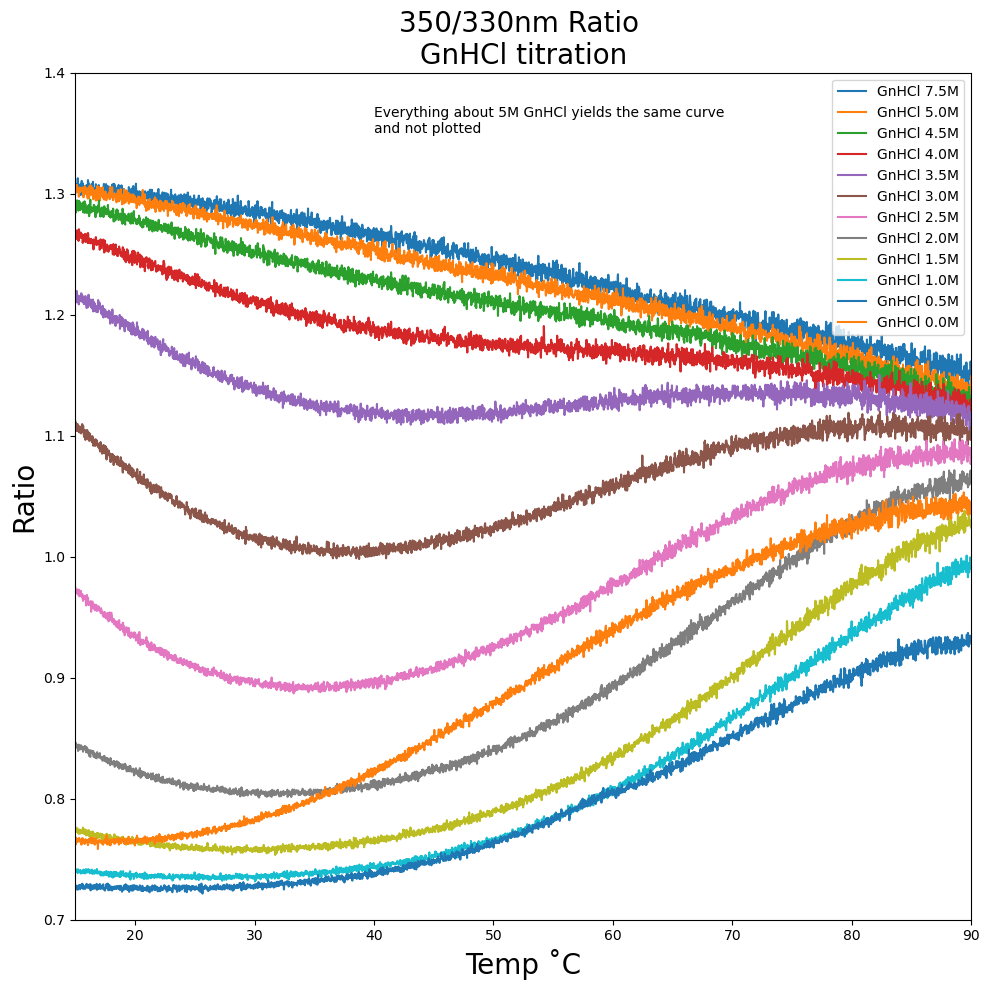

In [5]:
plt.figure(figsize=(10,10))
plt.plot(Ratio.Temp, Ratio.c1, label = "GnHCl 7.5M")
#plt.plot(Ratio.Temp, Ratio.c2, label = "GnHCl 7.0M")
#plt.plot(Ratio.Temp, Ratio.c3, label = "GnHCl 6.5M")
#plt.plot(Ratio.Temp, Ratio.c4, label = "GnHCl 6.0M")
#plt.plot(Ratio.Temp, Ratio.c5, label = "GnHCl 5.5M")
plt.plot(Ratio.Temp, Ratio.c6, label = "GnHCl 5.0M")
plt.plot(Ratio.Temp, Ratio.c7, label = "GnHCl 4.5M")
plt.plot(Ratio.Temp, Ratio.c8, label = "GnHCl 4.0M")
plt.plot(Ratio.Temp, Ratio.c9, label = "GnHCl 3.5M")
plt.plot(Ratio.Temp, Ratio.c10, label = "GnHCl 3.0M")
plt.plot(Ratio.Temp, Ratio.c11, label = "GnHCl 2.5M")
plt.plot(Ratio.Temp, Ratio.c12, label = "GnHCl 2.0M")
plt.plot(Ratio.Temp, Ratio.c13, label = "GnHCl 1.5M")
plt.plot(Ratio.Temp, Ratio.c14, label = "GnHCl 1.0M")
plt.plot(Ratio.Temp, Ratio.c15, label = "GnHCl 0.5M")
plt.plot(Ratio.Temp, Ratio.c16, label = "GnHCl 0.0M")
plt.title('350/330nm Ratio \nGnHCl titration', size = 20)
plt.xlabel('Temp ˚C', size = 20)
plt.ylabel('Ratio', size = 20)
plt.text(x = 40, y = 1.35, s='Everything about 5M GnHCl yields the same curve\nand not plotted')

plt.legend()
plt.xlim(15, 90)
plt.ylim(0.7, 1.4)
plt.savefig('./XCL1_Tm_GnHCL_titration.png')

(-0.01, 0.01)

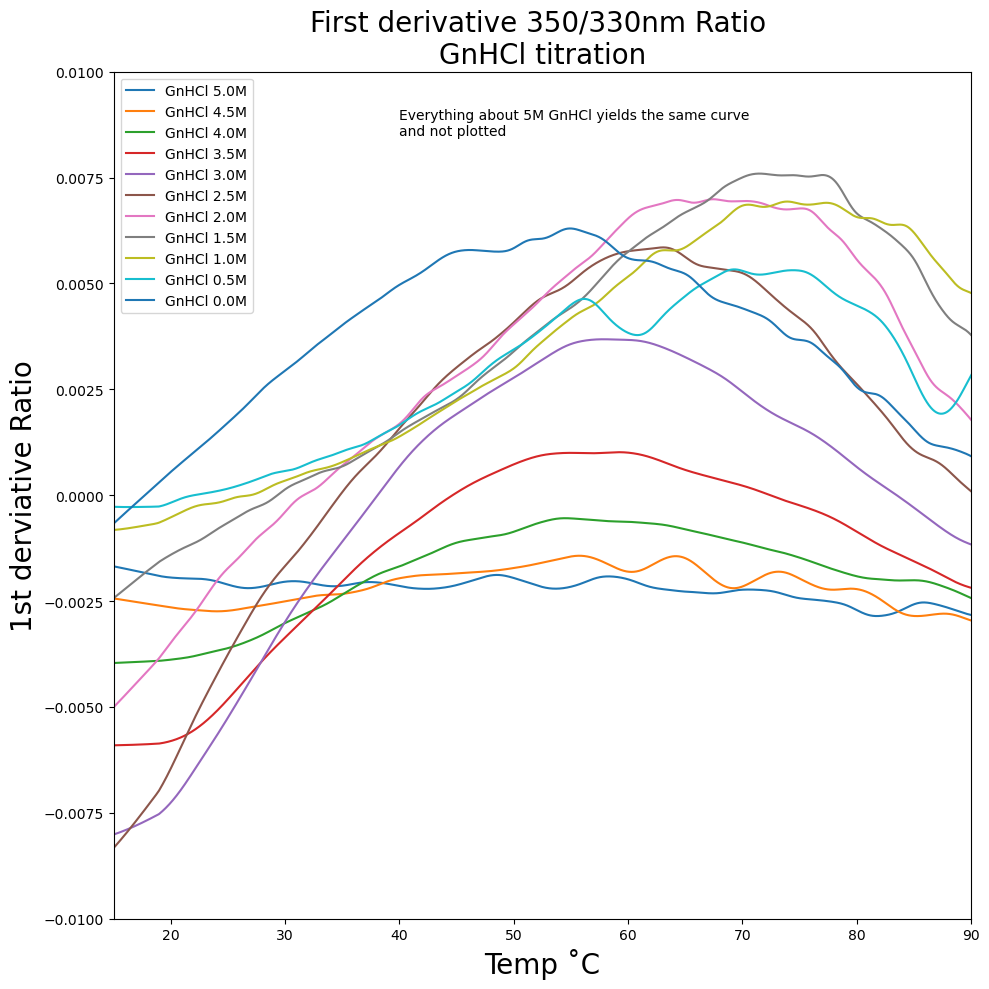

In [6]:
plt.figure(figsize=(10,10))
#plt.plot(dRatio.Temp, dRatio.c1, label = "GnHCl 7.5M")
#plt.plot(dRatio.Temp, dRatio.c2, label = "GnHCl 7.0M")
#plt.plot(dRatio.Temp, dRatio.c3, label = "GnHCl 6.5M")
#plt.plot(dRatio.Temp, dRatio.c4, label = "GnHCl 6.0M")
#plt.plot(dRatio.Temp, dRatio.c5, label = "GnHCl 5.5M")
plt.plot(dRatio.Temp, dRatio.c6, label = "GnHCl 5.0M")
plt.plot(dRatio.Temp, dRatio.c7, label = "GnHCl 4.5M")
plt.plot(dRatio.Temp, dRatio.c8, label = "GnHCl 4.0M")
plt.plot(dRatio.Temp, dRatio.c9, label = "GnHCl 3.5M")
plt.plot(dRatio.Temp, dRatio.c10, label = "GnHCl 3.0M")
plt.plot(dRatio.Temp, dRatio.c11, label = "GnHCl 2.5M")
plt.plot(dRatio.Temp, dRatio.c12, label = "GnHCl 2.0M")
plt.plot(dRatio.Temp, dRatio.c13, label = "GnHCl 1.5M")
plt.plot(dRatio.Temp, dRatio.c14, label = "GnHCl 1.0M")
plt.plot(dRatio.Temp, dRatio.c15, label = "GnHCl 0.5M")
plt.plot(dRatio.Temp, dRatio.c16, label = "GnHCl 0.0M")
plt.title('First derivative 350/330nm Ratio \nGnHCl titration', size = 20)
plt.xlabel('Temp ˚C', size = 20)
plt.ylabel('1st derviative Ratio', size = 20)
plt.text(x = 40, y = 0.0085, s='Everything about 5M GnHCl yields the same curve\nand not plotted')
plt.legend()
plt.xlim(15, 90)
plt.ylim(-0.01, 0.01)

# Next, we will plot out the Urea unfolding temperature experiments
### I want to point out 2 things
1. There is not more change in the curves after 5M GnHCl indicatiing the protein is unfolded after that conc.
2. Notice, that unlike the GnHCl titraion, there is no change in transition point from 0 to 0.5M Urea, it appears Urea has less of an influence on Ltn equilibrium than GnHCl. 

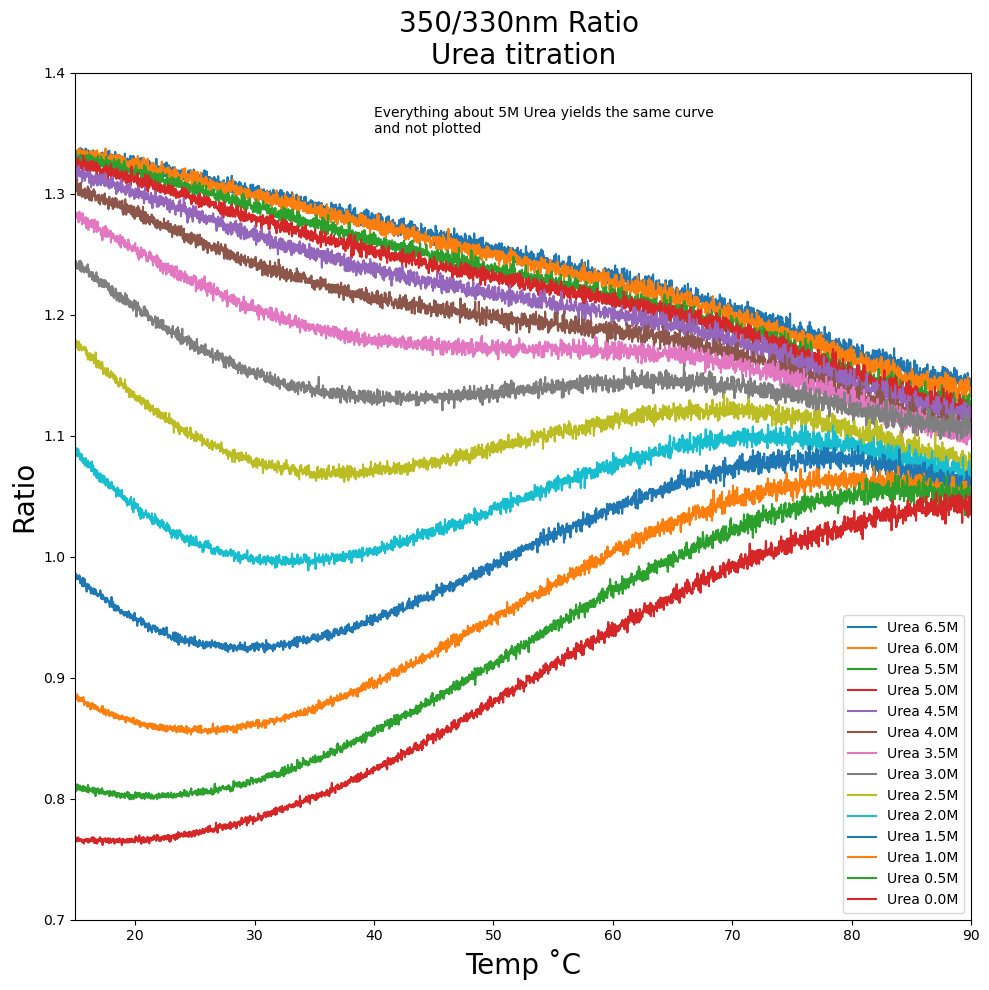

In [7]:
plt.figure(figsize=(10,10))
#plt.plot(Ratio.Temp, Ratio.c22, label = "Urea 7.5M")
#plt.plot(Ratio.Temp, Ratio.c23, label = "Urea 7.0M")
plt.plot(Ratio.Temp, Ratio.c24, label = "Urea 6.5M")
plt.plot(Ratio.Temp, Ratio.c25, label = "Urea 6.0M")
plt.plot(Ratio.Temp, Ratio.c26, label = "Urea 5.5M")
plt.plot(Ratio.Temp, Ratio.c27, label = "Urea 5.0M")
plt.plot(Ratio.Temp, Ratio.c28, label = "Urea 4.5M")
plt.plot(Ratio.Temp, Ratio.c29, label = "Urea 4.0M")
plt.plot(Ratio.Temp, Ratio.c30, label = "Urea 3.5M")
plt.plot(Ratio.Temp, Ratio.c31, label = "Urea 3.0M")
plt.plot(Ratio.Temp, Ratio.c32, label = "Urea 2.5M")
plt.plot(Ratio.Temp, Ratio.c33, label = "Urea 2.0M")
plt.plot(Ratio.Temp, Ratio.c34, label = "Urea 1.5M")
plt.plot(Ratio.Temp, Ratio.c35, label = "Urea 1.0M")
plt.plot(Ratio.Temp, Ratio.c36, label = "Urea 0.5M")
plt.plot(Ratio.Temp, Ratio.c37, label = "Urea 0.0M")
plt.title('350/330nm Ratio \nUrea titration', size = 20)
plt.xlabel('Temp ˚C', size = 20)
plt.ylabel('Ratio', size = 20)
plt.text(x = 40, y = 1.35, s='Everything about 5M Urea yields the same curve\nand not plotted')

plt.legend()
plt.xlim(15, 90)
plt.ylim(0.7, 1.4)
plt.savefig('./XCL1_Tm_Urea_titration.png')

(-0.01, 0.01)

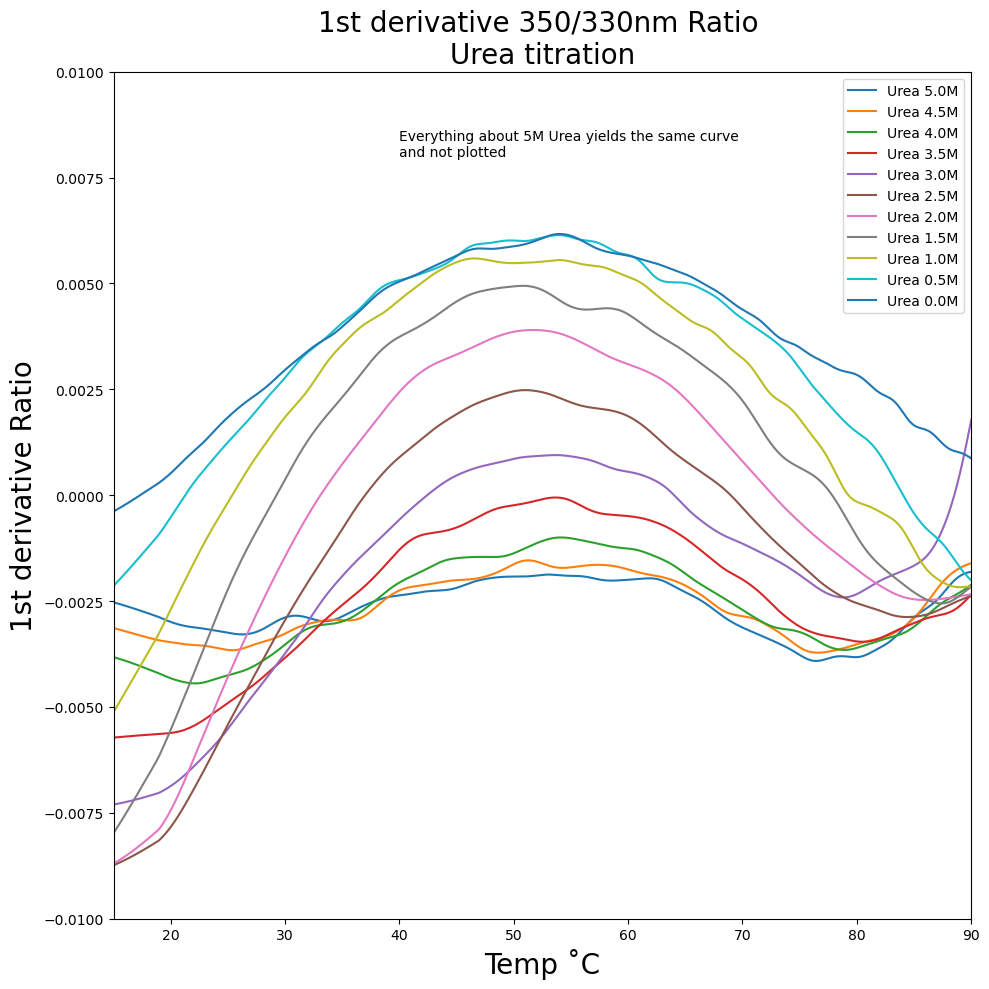

In [8]:
plt.figure(figsize=(10,10))
#plt.plot(Ratio.Temp, Ratio.c22, label = "Urea 7.5M")
#plt.plot(Ratio.Temp, Ratio.c23, label = "Urea 7.0M")
#plt.plot(Ratio.Temp, Ratio.c24, label = "Urea 6.5M")
#plt.plot(Ratio.Temp, Ratio.c25, label = "Urea 6.0M")
#plt.plot(Ratio.Temp, Ratio.c26, label = "Urea 5.5M")
plt.plot(dRatio.Temp, dRatio.c27, label = "Urea 5.0M")
plt.plot(dRatio.Temp, dRatio.c28, label = "Urea 4.5M")
plt.plot(dRatio.Temp, dRatio.c29, label = "Urea 4.0M")
plt.plot(dRatio.Temp, dRatio.c30, label = "Urea 3.5M")
plt.plot(dRatio.Temp, dRatio.c31, label = "Urea 3.0M")
plt.plot(dRatio.Temp, dRatio.c32, label = "Urea 2.5M")
plt.plot(dRatio.Temp, dRatio.c33, label = "Urea 2.0M")
plt.plot(dRatio.Temp, dRatio.c34, label = "Urea 1.5M")
plt.plot(dRatio.Temp, dRatio.c35, label = "Urea 1.0M")
plt.plot(dRatio.Temp, dRatio.c36, label = "Urea 0.5M")
plt.plot(dRatio.Temp, dRatio.c37, label = "Urea 0.0M")
plt.title('1st derivative 350/330nm Ratio \nUrea titration', size = 20)
plt.xlabel('Temp ˚C', size = 20)
plt.ylabel('1st derivative Ratio', size = 20)
plt.text(x = 40, y = 0.008, s='Everything about 5M Urea yields the same curve\nand not plotted')

plt.legend()
plt.xlim(15, 90)
plt.ylim(-0.01, 0.01)

# Now we will create a function to find the mean of each each point that is +/- 0.1˚C

### This will reduce noise and also bring the number of points to fit down from over 3,000 to just about 75.

In [9]:
def per_degree_mean(table, cols):
    newtab = pd.DataFrame(columns = cols)
    temp_range = np.arange(15, 91, 1)
    for temp in temp_range:
        cond1 = A330.Temp >= temp - 0.1 
        cond2 = A330.Temp <= temp + 0.1
        cond = cond1 & cond2
        nexttable = pd.DataFrame([table[cond1 & cond2].mean()], columns=cols)
        newtab = pd.concat([newtab,nexttable], ignore_index = True)
    return(newtab)
        
    

In [10]:
A330mean = per_degree_mean(A330, newcols)
A350mean = per_degree_mean(A350, newcols)
Ratiomean = per_degree_mean(Ratio, newcols)

In [11]:
A330mean

,Time,Temp,c1,c2,c3,c4,c5,c6,c7,c8,...,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37
0,27.823709,15.043872,707.421779,862.054032,1019.110475,1016.774483,853.778458,955.786621,881.724672,896.317606,...,939.521633,919.090253,973.330827,1045.431682,1049.139094,1117.607053,1382.313458,1542.482186,1725.428340,1681.461075
1,166.838541,16.009049,691.636914,844.695703,997.152026,996.647136,835.517632,936.922034,866.534572,879.745514,...,919.885360,901.853934,957.585571,1028.440196,1037.796906,1108.710678,1373.663604,1528.422437,1697.881074,1655.820014
2,285.217850,16.996161,678.591870,827.048872,977.253083,977.700399,818.596166,917.367824,848.913908,865.156385,...,902.238179,886.092734,940.657400,1016.176952,1025.126762,1100.751791,1363.201273,1512.109555,1674.792235,1630.922534
3,406.396618,18.005210,664.496628,810.531544,957.188961,957.422784,802.280765,900.013801,833.430665,848.688161,...,883.158382,867.975792,925.852427,1002.132301,1012.288771,1088.593106,1349.442553,1495.791083,1650.378526,1603.749572
4,524.764787,18.992322,650.701256,795.045279,937.960042,937.632108,785.471360,883.882614,818.273692,834.876229,...,867.483002,852.411482,909.871830,987.737357,1001.535872,1078.896235,1338.757843,1475.196550,1624.642142,1578.759208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8562.106097,86.006307,170.239988,209.485262,252.487313,249.808922,209.035938,233.563510,214.087928,210.608932,...,224.048895,219.296351,223.691541,228.473386,217.806601,208.497086,224.733025,213.426527,204.463228,187.639334
72,8681.068627,86.993419,167.194999,205.161454,247.272824,245.023007,204.985001,228.356527,209.936211,205.956955,...,219.967936,214.366142,219.329446,224.304886,213.421945,203.807237,220.275656,208.867153,200.086495,181.681144
73,8802.643354,88.002468,163.299852,200.922680,243.259314,239.583138,200.890300,223.918287,205.294306,201.117612,...,216.119522,210.129136,214.665598,219.896104,208.840275,199.584130,215.643766,203.887488,194.248751,176.408312
74,8922.729102,89.000548,158.512665,196.815741,237.937851,234.567712,196.430363,218.869990,202.640193,196.014605,...,213.987774,206.203094,210.008843,216.041591,204.556279,195.239871,211.519760,199.751083,190.383806,171.644011


In [12]:
TA330 = A330mean.T
temps = TA330.loc['Temp'].values.tolist()
tempnames = ['{:.0f}'.format(x) for x in temps]
urea = [4.5, 4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5, 0.0]
TA330 = TA330.drop(['Temp', 'Time', 'c1', 'c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14','c15','c16', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27'])
TA330.columns = tempnames

(0.0, 4.5)

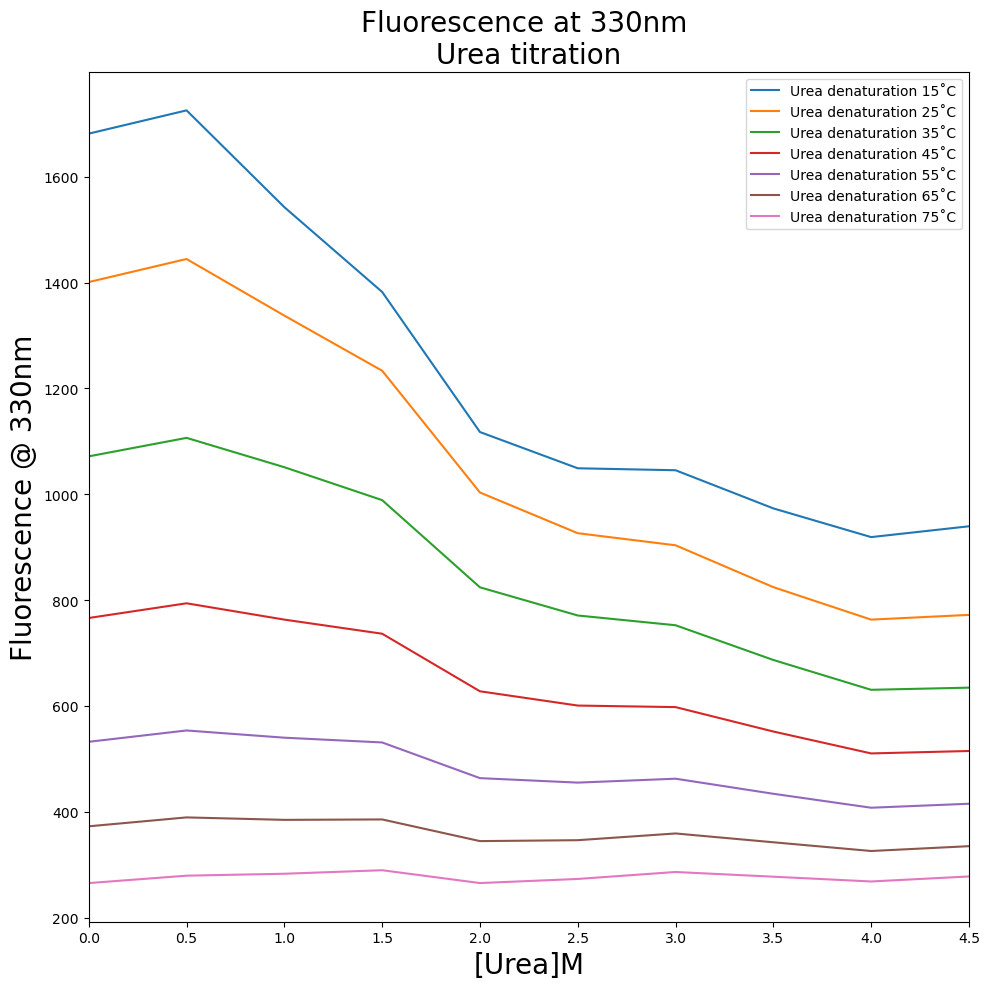

In [13]:
plt.figure(figsize=(10,10))

plt.plot(urea, TA330['15'], label = "Urea denaturation 15˚C")
plt.plot(urea, TA330['25'], label = "Urea denaturation 25˚C")
plt.plot(urea, TA330['35'], label = "Urea denaturation 35˚C")
plt.plot(urea, TA330['45'], label = "Urea denaturation 45˚C")
plt.plot(urea, TA330['55'], label = "Urea denaturation 55˚C")
plt.plot(urea, TA330['65'], label = "Urea denaturation 65˚C")
plt.plot(urea, TA330['75'], label = "Urea denaturation 75˚C")

plt.title('Fluorescence at 330nm \nUrea titration', size = 20)
plt.xlabel('[Urea]M', size = 20)
plt.ylabel('Fluorescence @ 330nm', size = 20)
plt.legend()
plt.xlim(0, 4.5)
#plt.ylim(-0.01, 0.01)

In [14]:
TA350 = A350mean.T
TA350 = TA350.drop(['Temp', 'Time', 'c1', 'c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14','c15','c16', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27'])
TA350.columns = tempnames

In [15]:
TRatio = Ratiomean.T
TRatio = TRatio.drop(['Temp', 'Time', 'c1', 'c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14','c15','c16', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27'])
TRatio.columns = tempnames

(0.0, 5.0)

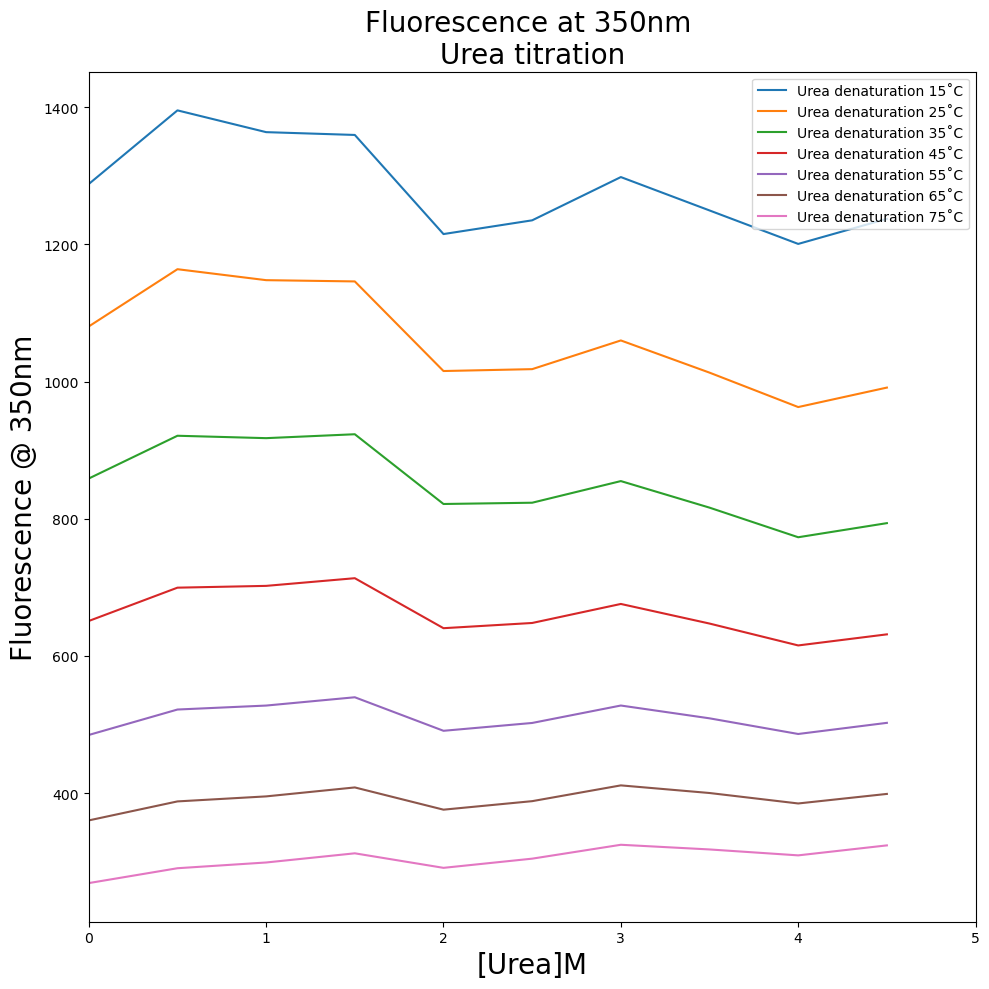

In [16]:
plt.figure(figsize=(10,10))

plt.plot(urea, TA350['15'], label = "Urea denaturation 15˚C")
plt.plot(urea, TA350['25'], label = "Urea denaturation 25˚C")
plt.plot(urea, TA350['35'], label = "Urea denaturation 35˚C")
plt.plot(urea, TA350['45'], label = "Urea denaturation 45˚C")
plt.plot(urea, TA350['55'], label = "Urea denaturation 55˚C")
plt.plot(urea, TA350['65'], label = "Urea denaturation 65˚C")
plt.plot(urea, TA350['75'], label = "Urea denaturation 75˚C")

plt.title('Fluorescence at 350nm \nUrea titration', size = 20)
plt.xlabel('[Urea]M', size = 20)
plt.ylabel('Fluorescence @ 350nm', size = 20)
plt.legend()
plt.xlim(0, 5)
#plt.ylim(-0.01, 0.01)

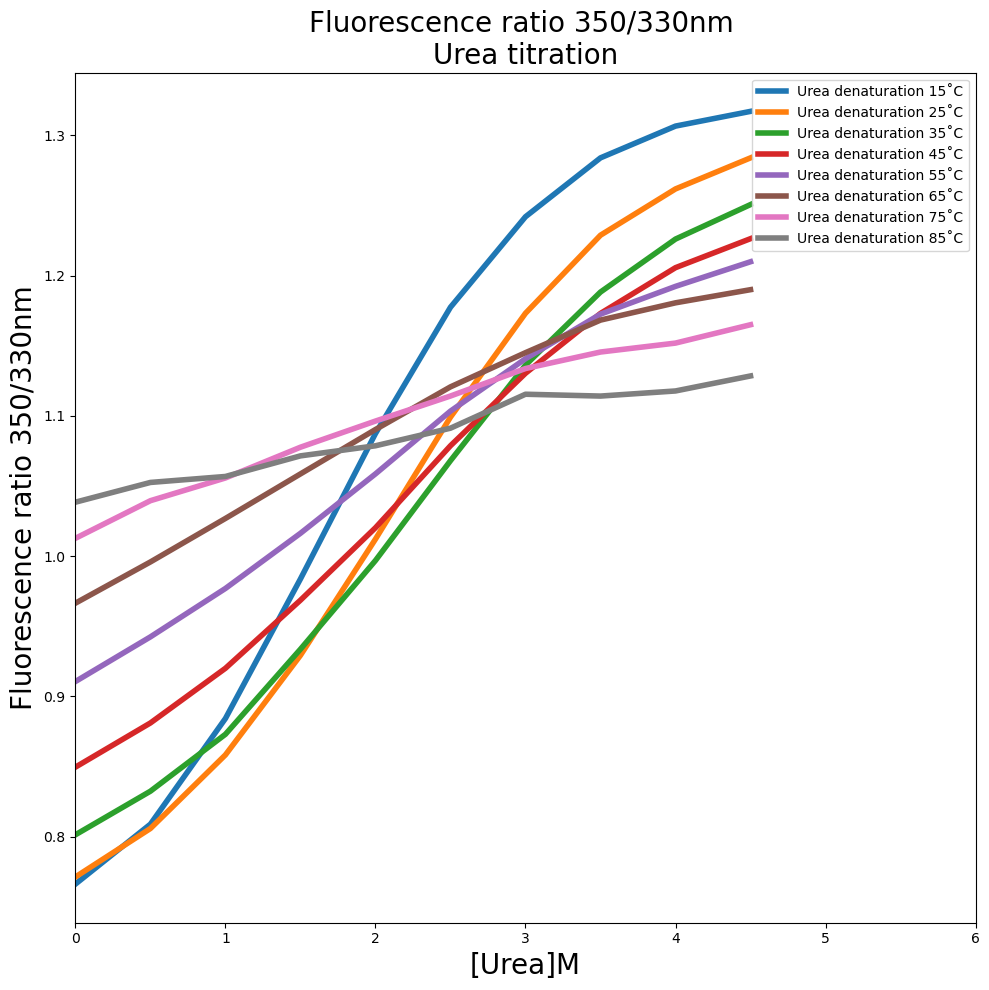

In [17]:
plt.figure(figsize=(10,10))

plt.plot(urea, TRatio['15'], label = "Urea denaturation 15˚C", lw = 4)
plt.plot(urea, TRatio['25'], label = "Urea denaturation 25˚C", lw = 4)
plt.plot(urea, TRatio['35'], label = "Urea denaturation 35˚C", lw = 4)
plt.plot(urea, TRatio['45'], label = "Urea denaturation 45˚C", lw = 4)
plt.plot(urea, TRatio['55'], label = "Urea denaturation 55˚C", lw = 4)
plt.plot(urea, TRatio['65'], label = "Urea denaturation 65˚C", lw = 4)
plt.plot(urea, TRatio['75'], label = "Urea denaturation 75˚C", lw = 4)
plt.plot(urea, TRatio['85'], label = "Urea denaturation 85˚C", lw = 4)

plt.title('Fluorescence ratio 350/330nm \nUrea titration', size = 20)
plt.xlabel('[Urea]M', size = 20)
plt.ylabel('Fluorescence ratio 350/330nm', size = 20)
plt.legend()
plt.xlim(0, 6)
plt.savefig('./Urea_Tm_ureavsRatio.png')

#plt.ylim(-0.01, 0.01)

In [18]:
def dGD(set, temp):
    values = set[str(temp)]
    Yd = max(values) * 1.01
    Yn = min(values) * 0.99
    deltaG = []
    for point in values:
        fd = ((point-Yn)/(Yd-Yn))
        keq = fd/(1 - fd) 
        print(fd)
        print(keq)
        deltaG.append(-1 * 0.001987*(temp+273.15)*np.log(keq))
    return(deltaG)

In [19]:
def dGD_table(table, tempnames, conc):
    final_table = pd.DataFrame(index = conc)
    for items in tempnames:
        newset = dGD(table, int(items))
        final_table['t' + items] = newset
    return final_table
        

In [20]:
TRatio

,15,16,17,18,19,20,21,22,23,24,...,81,82,83,84,85,86,87,88,89,90
c28,1.317039,1.315545,1.312493,1.309699,1.304231,1.299264,1.298114,1.294581,1.290978,1.289414,...,1.137267,1.139827,1.135862,1.134181,1.128400,1.121973,1.122754,1.119398,1.117590,1.117117
c29,1.306543,1.301232,1.295415,1.291888,1.286600,1.284119,1.280814,1.274080,1.270156,1.266908,...,1.133215,1.126971,1.120490,1.120967,1.117700,1.113447,1.112993,1.111749,1.107055,1.108253
c30,1.283889,1.274607,1.270818,1.264583,1.261079,1.255258,1.246940,1.242973,1.236683,1.232421,...,1.128146,1.123598,1.120733,1.118129,1.114060,1.112324,1.108036,1.101817,1.102306,1.097397
c31,1.241908,1.237810,1.226407,1.219753,1.212675,1.208058,1.200040,1.191779,1.185692,1.180630,...,1.119087,1.118544,1.115345,1.112099,1.115369,1.109951,1.110946,1.109782,1.106226,1.106463
c32,1.177390,1.166705,1.158804,1.150892,1.141200,1.132529,1.125405,1.118480,1.111939,1.104524,...,1.099743,1.103395,1.097485,1.095723,1.091155,1.088993,1.085820,1.081539,1.076071,1.077556
c33,1.087333,1.076502,1.065078,1.058455,1.049451,1.042978,1.034691,1.027754,1.019189,1.015856,...,1.086973,1.085758,1.087100,1.084769,1.078617,1.076093,1.074867,1.074450,1.070370,1.069953
c34,0.983680,0.975579,0.968920,0.962064,0.953666,0.949392,0.942646,0.938421,0.933317,0.931340,...,1.078957,1.075611,1.075854,1.075370,1.071422,1.071821,1.065713,1.062979,1.061100,1.058786
c35,0.884189,0.878075,0.872929,0.870415,0.866936,0.863151,0.860131,0.858936,0.858234,0.857123,...,1.060496,1.061781,1.062809,1.062606,1.056736,1.060623,1.055201,1.054709,1.051024,1.049673
c36,0.808843,0.807288,0.805591,0.804296,0.802864,0.802554,0.802533,0.802480,0.803009,0.803677,...,1.051247,1.054503,1.056917,1.055621,1.052478,1.057288,1.051363,1.051672,1.046078,1.048255
c37,0.766123,0.765427,0.766312,0.765288,0.765192,0.766134,0.766314,0.767159,0.767798,0.769678,...,1.029360,1.031634,1.036171,1.035737,1.038394,1.040270,1.041890,1.042915,1.043278,1.044457


In [21]:
dGtable = dGD_table(TRatio, tempnames = tempnames, conc = urea)

0.976964669192675
42.41157539105147
0.958607357415034
23.15888277602273
0.9189855074927918
11.343470520549472
0.8455598685967723
5.4750009658376975
0.7327151925652466
2.7413274985489364
0.5752034441170334
1.3540680501079783
0.3939114226168375
0.6499238515887934
0.21989929618348728
0.2818857810378411
0.08811828108384703
0.0966334550368911
0.013399680924644488
0.013581670982229871
0.9769577598603186
42.398558210400985
0.9518880230031994
19.78484532170647
0.9052535438466573
9.554484469387935
0.8408022781074225
5.281496921637949
0.7162600172130629
2.5243534949775084
0.5582665497461045
1.263808637143574
0.38149476503861973
0.6168011901507033
0.2107134047897991
0.26696691172574954
0.08672851375388402
0.09496465734452121
0.013406729839472706
0.013588912721137165
0.9768507358343871
42.19791734397547
0.9467283787685898
17.77172079400462
0.9033449456935057
9.346070437547818
0.8250152197509755
4.714782728971508
0.7057791806055514
2.3988077460261072
0.5404679381262786
1.1761267231769308
0.37086900

In [22]:
dGtable

,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,...,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90
4.5,-2.145601,-2.152871,-2.157582,-2.164388,-2.168573,-2.171898,-2.178388,-2.182621,-2.186980,-2.191258,...,-1.647469,-1.652378,-1.607107,-1.604555,-1.555426,-1.502383,-1.499640,-1.470742,-1.457811,-1.448036
4.0,-1.799181,-1.714957,-1.659022,-1.648685,-1.653100,-1.705248,-1.664275,-1.603042,-1.598264,-1.569215,...,-1.408489,-1.038468,-0.895017,-0.964469,-1.000585,-1.029650,-0.971003,-1.030952,-0.884468,-0.945135
3.5,-1.390529,-1.296745,-1.288515,-1.252071,-1.272946,-1.261164,-1.186257,-1.180855,-1.152694,-1.125838,...,-1.176548,-0.923688,-0.903273,-0.865485,-0.862081,-0.980540,-0.774407,-0.631062,-0.694521,-0.518623
3.0,-0.973452,-0.956157,-0.894024,-0.868163,-0.853609,-0.851613,-0.806518,-0.772768,-0.753864,-0.729577,...,-0.857954,-0.769371,-0.730888,-0.676600,-0.910154,-0.882854,-0.886215,-0.941652,-0.849387,-0.865791
2.5,-0.577388,-0.532016,-0.504446,-0.478738,-0.452130,-0.426945,-0.397804,-0.376101,-0.356539,-0.324283,...,-0.352378,-0.381090,-0.258613,-0.245084,-0.187359,-0.207621,-0.086478,-0.000002,0.142527,0.110264
2.0,-0.173549,-0.134517,-0.093528,-0.074784,-0.049994,-0.032041,0.000770,0.024630,0.055511,0.071283,...,-0.067838,0.011152,-0.013640,0.016120,0.133713,0.150761,0.221217,0.208864,0.318210,0.349499
1.5,0.246714,0.277623,0.304690,0.328549,0.358352,0.374062,0.405856,0.424641,0.447580,0.462961,...,0.106560,0.233752,0.251146,0.240471,0.322112,0.271440,0.493777,0.571424,0.628402,0.744383
1.0,0.724998,0.758756,0.793617,0.803609,0.821420,0.848318,0.871756,0.883492,0.890568,0.911114,...,0.531276,0.559742,0.583684,0.568323,0.754627,0.612623,0.858693,0.881275,1.045631,1.164251
0.5,1.337962,1.352614,1.386521,1.393080,1.410147,1.425814,1.432005,1.444827,1.446261,1.465149,...,0.779252,0.754893,0.754179,0.773194,0.904421,0.726587,1.018978,1.014897,1.318510,1.245621
0.0,2.461429,2.469665,2.473466,2.480902,2.483817,2.485280,2.492185,2.495239,2.498527,2.501696,...,1.724016,1.729171,1.678495,1.675383,1.620934,1.562642,1.559443,1.527815,1.513607,1.502846


(-2.5, 2.5)

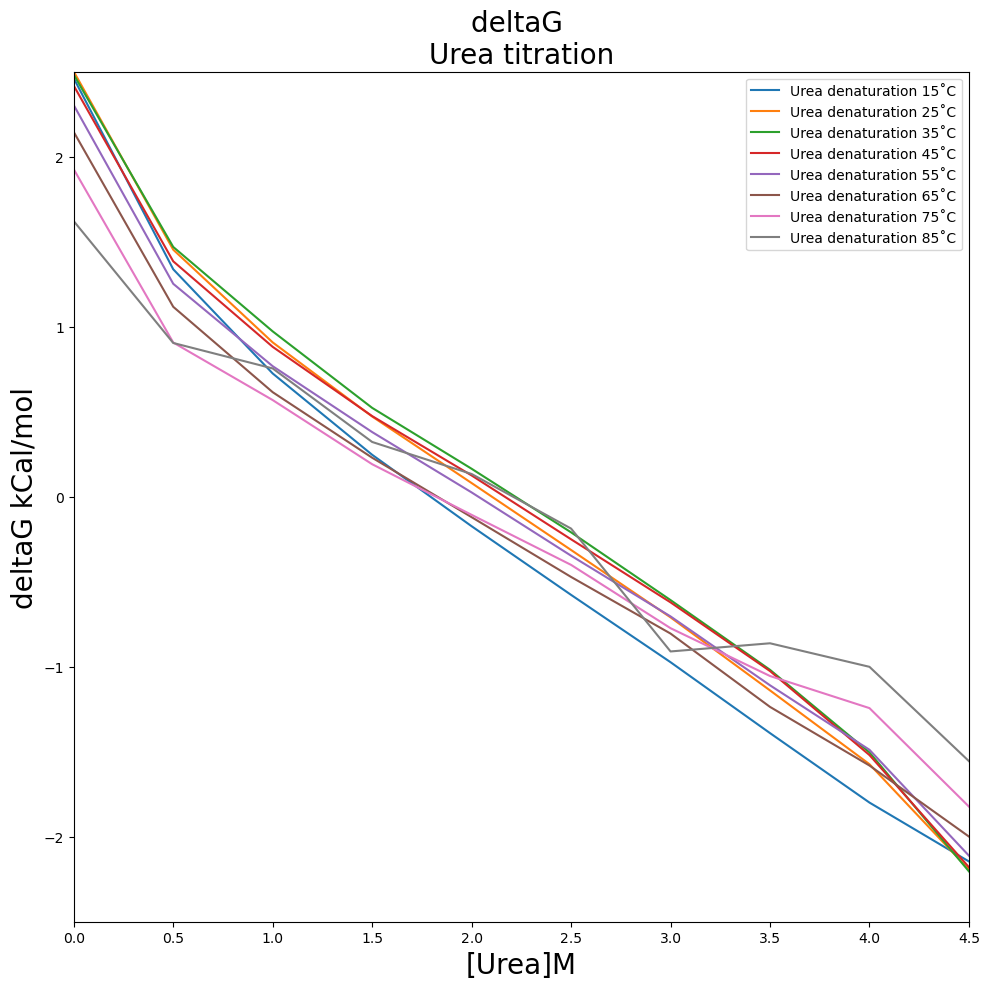

In [23]:
plt.figure(figsize=(10,10))

plt.plot(urea, dGtable['t15'], label = "Urea denaturation 15˚C")
plt.plot(urea, dGtable['t25'], label = "Urea denaturation 25˚C")
plt.plot(urea, dGtable['t35'], label = "Urea denaturation 35˚C")
plt.plot(urea, dGtable['t45'], label = "Urea denaturation 45˚C")
plt.plot(urea, dGtable['t55'], label = "Urea denaturation 55˚C")
plt.plot(urea, dGtable['t65'], label = "Urea denaturation 65˚C")
plt.plot(urea, dGtable['t75'], label = "Urea denaturation 75˚C")
plt.plot(urea, dGtable['t85'], label = "Urea denaturation 85˚C")

plt.title('deltaG \nUrea titration', size = 20)
plt.xlabel('[Urea]M', size = 20)
plt.ylabel('deltaG kCal/mol', size = 20)
plt.legend()
plt.xlim(0, 4.5)
plt.ylim(-2.5, 2.5)


In [24]:
def dGH2O(table, upper_conc, lower_conc):
    temps = table.columns
    cond1 = table.index >= lower_conc
    cond2 = table.index <= upper_conc
    cond = cond1 & cond2
    t2 = table[cond]
    inter = []
    err = []
    slo = []
    temp = []
    for point in temps:
        dG = t2[point].values
        uc = t2.index.values
        slope, intercept, rvalue, pvalue, stderr = (linregress(uc, dG))
        print(rvalue)
        inter.append(intercept)
        slo.append(slope)
        err.append(stderr)
        temp.append(int(point[1:]))
   
        
    return temp, inter, err, slo


In [25]:
temp, inter, err, slo = dGH2O(dGtable, 4.5, 0.5)

-0.9977893952119028
-0.9980677351308204
-0.9981245397347706
-0.9983111983131266
-0.9986875750949646
-0.9990413833173675
-0.998891528239423
-0.998654354388758
-0.9986244905985326
-0.9982546950119876
-0.9983530344352339
-0.9981718867517613
-0.9982781720627312
-0.9980848265998286
-0.9974885915530782
-0.9971543145593461
-0.9973156853943003
-0.9977418681371821
-0.9970899624983263
-0.9969263607692013
-0.9964599405508476
-0.9964748112584922
-0.9959872851616131
-0.9971157752652084
-0.9966142248535322
-0.9964831616718294
-0.9966128946889349
-0.9960532952606089
-0.9961167600756359
-0.9968515583175362
-0.9963817778142791
-0.9966142222264288
-0.9967812471894629
-0.9965422839393413
-0.9968765328376232
-0.997282190308404
-0.9978372632352808
-0.9968072706871249
-0.9969044657882064
-0.9972882163366691
-0.997809197208329
-0.9988766519522555
-0.9982838397659901
-0.998337604352342
-0.999055759274339
-0.9983561770963136
-0.9987331801105179
-0.9989968931244062
-0.9989628927302502
-0.9981359250321755
-0.999

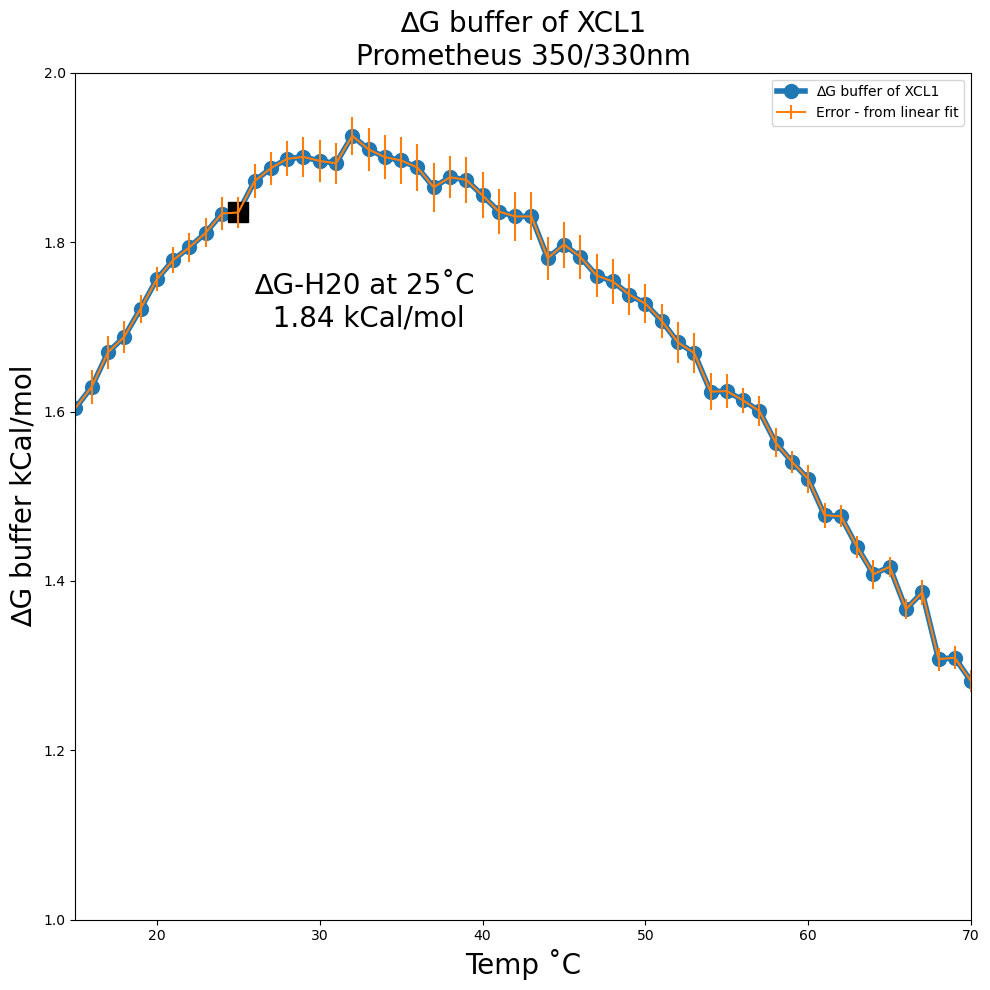

In [26]:
plt.figure(figsize=(10,10))

plt.plot(temp, inter, label = "∆G buffer of XCL1", ls = '-', linewidth = 4, marker = 'o', ms = 10)
plt.plot(25, inter[10], 'ks', ms = 15)
plt.errorbar(temp, inter, yerr=err, label='Error - from linear fit')


plt.title('∆G buffer of XCL1\nPrometheus 350/330nm', size = 20)
plt.xlabel('Temp ˚C', size = 20)
plt.ylabel('∆G buffer kCal/mol', size = 20)
plt.text(x = 26, y = 1.7, s = '∆G-H20 at 25˚C\n  ' + str(round(inter[10], 2)) + ' kCal/mol', size = 20)
plt.legend()
plt.xlim(15, 70)
plt.ylim(1.0, 2.0)
plt.savefig('./dG_Prometheus.png')

(-0.9, -0.68)

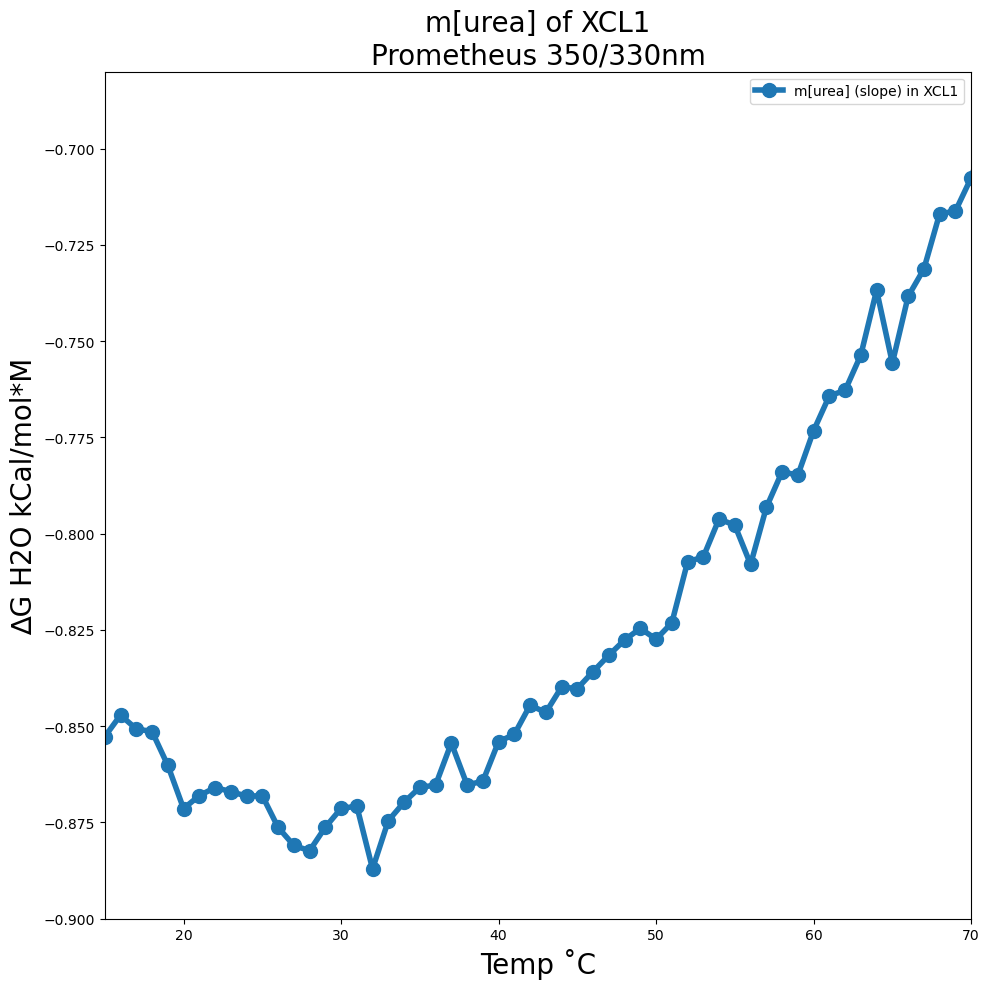

In [27]:
plt.figure(figsize=(10,10))

plt.plot(temp, slo, label = "m[urea] (slope) in XCL1", ls = '-', linewidth = 4, marker = 'o', ms = 10)



plt.title('m[urea] of XCL1\nPrometheus 350/330nm', size = 20)

plt.xlabel('Temp ˚C', size = 20)
plt.ylabel('∆G H2O kCal/mol*M', size = 20)
plt.legend()
plt.xlim(15, 70)
plt.ylim(-0.90, -0.68)
#plt.savefig('./XCL1_dGH2O_landscape.png')

In [28]:
midpoint = [i / -j for i, j in zip(inter, slo)]

In [29]:
midpoint

[1.881051918122709,
 1.9231047510076344,
 1.9628932332608424,
 1.98298400626337,
 2.0013257759618384,
 2.015367659604618,
 2.049066143590612,
 2.0717114771321032,
 2.088812240983653,
 2.1122537787118145,
 2.1139485835975242,
 2.136356277212876,
 2.142367841116989,
 2.151496876265377,
 2.1690592607776673,
 2.1757505001755217,
 2.1740182651001274,
 2.170772006138157,
 2.1833839845203684,
 2.185009027181304,
 2.1901683916478065,
 2.182075307275562,
 2.1827045676753003,
 2.1688830635698384,
 2.1677340178437974,
 2.1722223813230994,
 2.1547774394482175,
 2.1672572056729544,
 2.1624812413645422,
 2.120808403668466,
 2.138906093147138,
 2.1327191111176727,
 2.1172166770871828,
 2.1188848664806845,
 2.1078663993837448,
 2.0876984482851246,
 2.073675113910756,
 2.0829894644947284,
 2.0707152850754484,
 2.0392274748058212,
 2.0356055173732197,
 1.9964932343863062,
 2.017925063700017,
 1.9939370599531903,
 1.9632011858879013,
 1.9661074279206023,
 1.9335374230538251,
 1.9354378866909772,
 1.91105

(1.8, 2.2)

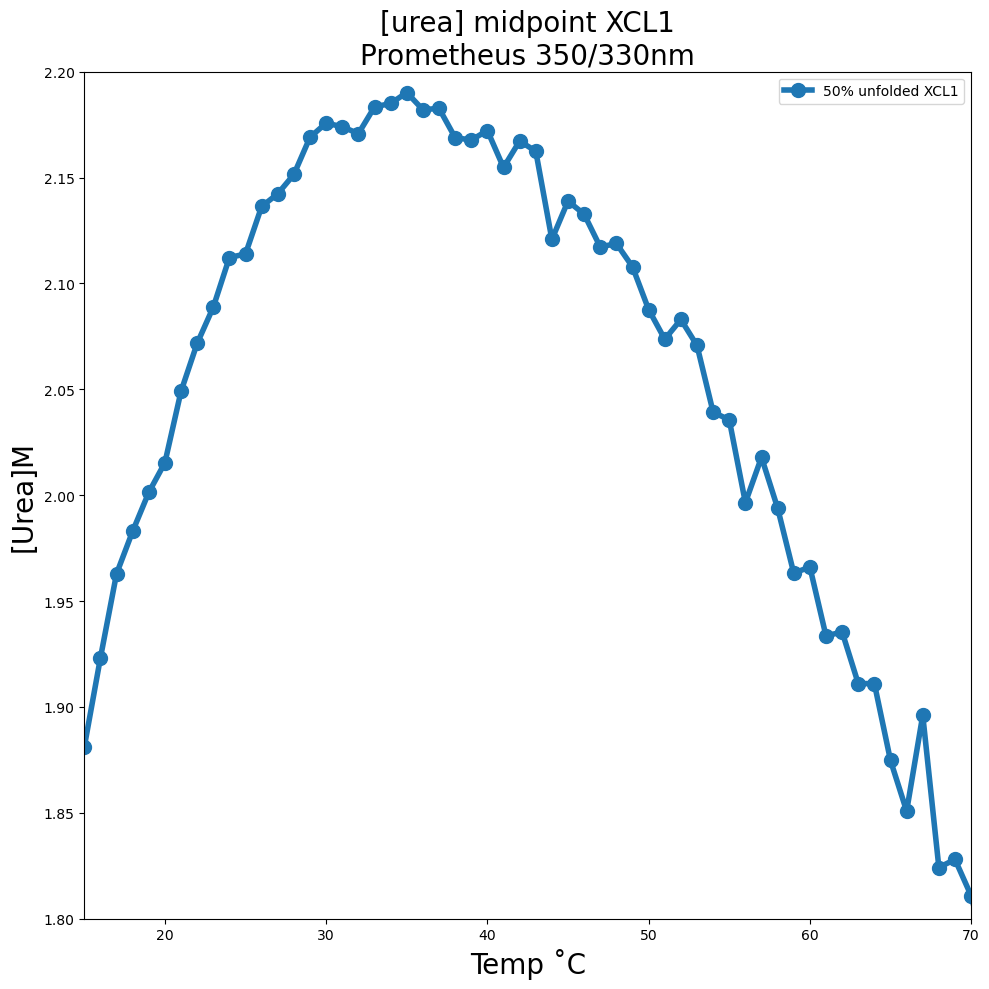

In [30]:
plt.figure(figsize=(10,10))

plt.plot(temp, midpoint, label = "50% unfolded XCL1", ls = '-', linewidth = 4, marker = 'o', ms = 10)



plt.title('[urea] midpoint XCL1\nPrometheus 350/330nm', size = 20)

plt.xlabel('Temp ˚C', size = 20)
plt.ylabel('[Urea]M', size = 20)
plt.legend()
plt.xlim(15, 70)
plt.ylim(1.8, 2.2)
#plt.savefig('./XCL1_dGH2O_landscape.png')

In [31]:
GnTRatio = Ratiomean.T
temps = GnTRatio.loc['Temp'].values.tolist()
tempnames = ['{:.0f}'.format(x) for x in temps]
Gn = [7.5, 7.0, 6.5, 6.0, 5.5, 5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5, 0.0]
GnTRatio = GnTRatio.drop(['Temp', 'Time', 'c20', 'c21','c22','c23','c24','c25','c26','c27','c28','c29','c30','c31','c32','c33','c34','c35','c36', 'c37'])
GnTRatio.columns = tempnames

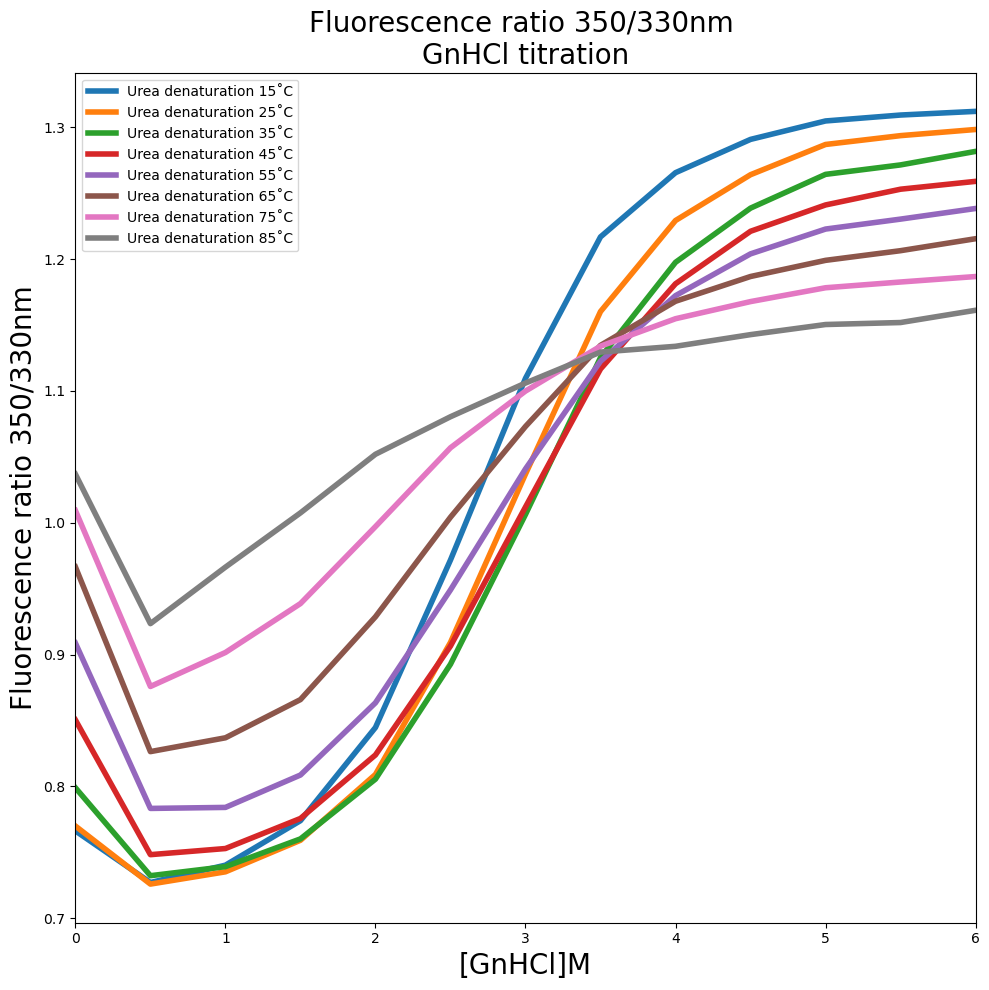

In [32]:
plt.figure(figsize=(10,10))

plt.plot(Gn, GnTRatio['15'], label = "Urea denaturation 15˚C", lw = 4)
plt.plot(Gn, GnTRatio['25'], label = "Urea denaturation 25˚C", lw = 4)
plt.plot(Gn, GnTRatio['35'], label = "Urea denaturation 35˚C", lw = 4)
plt.plot(Gn, GnTRatio['45'], label = "Urea denaturation 45˚C", lw = 4)
plt.plot(Gn, GnTRatio['55'], label = "Urea denaturation 55˚C", lw = 4)
plt.plot(Gn, GnTRatio['65'], label = "Urea denaturation 65˚C", lw = 4)
plt.plot(Gn, GnTRatio['75'], label = "Urea denaturation 75˚C", lw = 4)
plt.plot(Gn, GnTRatio['85'], label = "Urea denaturation 85˚C", lw = 4)

plt.title('Fluorescence ratio 350/330nm \nGnHCl titration', size = 20)
plt.xlabel('[GnHCl]M', size = 20)
plt.ylabel('Fluorescence ratio 350/330nm', size = 20)
plt.legend()
plt.xlim(0, 6)
plt.savefig('./Urea_Tm_GnHClvsRatio.png')

#plt.ylim(-0.01, 0.01)

In [33]:
GndGtable = dGD_table(GnTRatio, tempnames = tempnames, conc = Gn)

0.9663905088648137
28.75350016391901
0.9700241023241092
32.36013522638508
0.9702458555999942
32.60876342321594
0.9783261692229906
45.13859037142415
0.9737307123511025
37.067267501331365
0.9663028554292911
28.676104985739492
0.9432091014053372
16.60845531142872
0.9014908995698507
9.151346379506116
0.8210184557299939
4.587168241723462
0.64380423557026
1.807444949832499
0.4160998979488436
0.7126217249956713
0.20628021057771573
0.2598904718349766
0.08947917706231812
0.0982725214055234
0.03374059151928534
0.034918771525688855
0.01201067584321131
0.0121566858563598
0.07672041065302981
0.0830955341569867
0.9728422781539957
35.821939839815016
0.9755696871349006
39.9327545464461
0.9749510558568155
38.92184238520441
0.978263814810015
45.006232982444075
0.9727017192437878
35.63234358714814
0.9613175498234552
24.851516525867645
0.9402045649181126
15.72368465302644
0.9014694709822962
9.149138647376207
0.8135616799183893
4.363704197518325
0.6310923011211941
1.710705152099635
0.40578345777611163
0.68

(-2.5, 2.5)

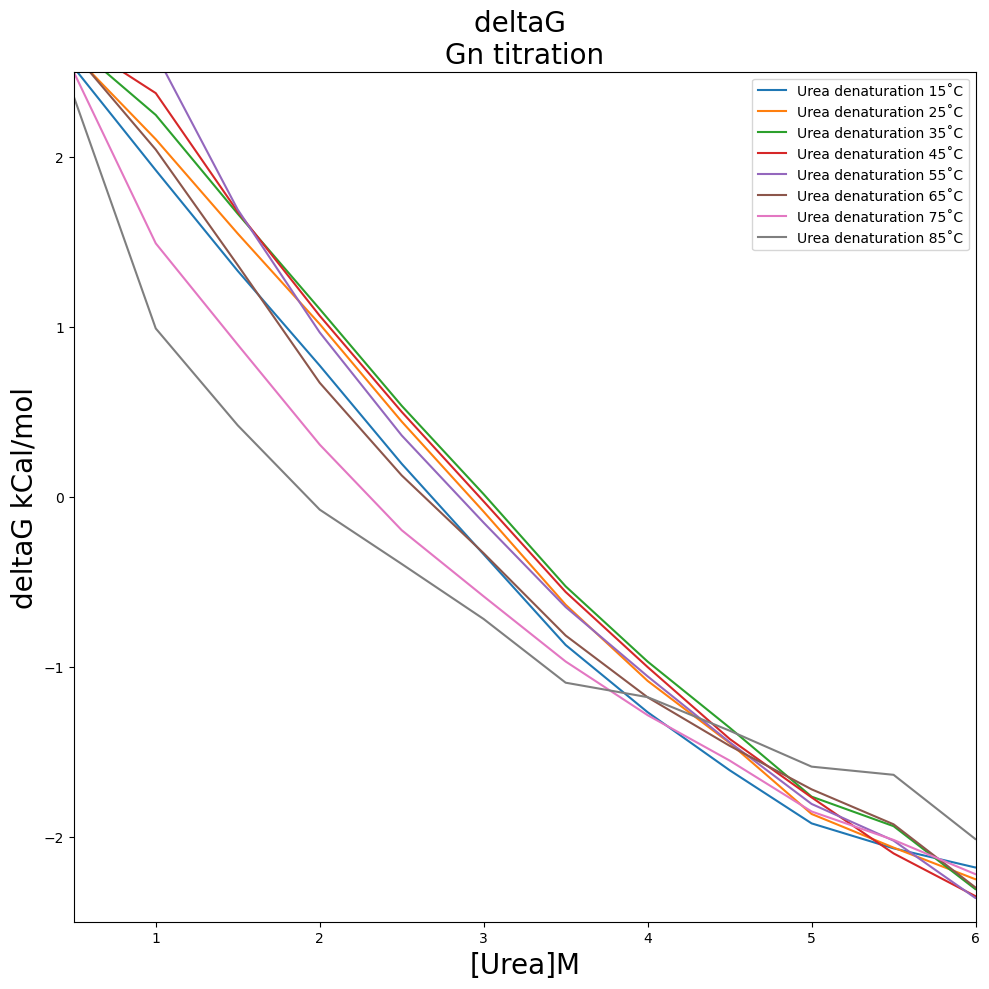

In [34]:
plt.figure(figsize=(10,10))

plt.plot(Gn, GndGtable['t15'], label = "Urea denaturation 15˚C")
plt.plot(Gn, GndGtable['t25'], label = "Urea denaturation 25˚C")
plt.plot(Gn, GndGtable['t35'], label = "Urea denaturation 35˚C")
plt.plot(Gn, GndGtable['t45'], label = "Urea denaturation 45˚C")
plt.plot(Gn, GndGtable['t55'], label = "Urea denaturation 55˚C")
plt.plot(Gn, GndGtable['t65'], label = "Urea denaturation 65˚C")
plt.plot(Gn, GndGtable['t75'], label = "Urea denaturation 75˚C")
plt.plot(Gn, GndGtable['t85'], label = "Urea denaturation 85˚C")

plt.title('deltaG \nGn titration', size = 20)
plt.xlabel('[Urea]M', size = 20)
plt.ylabel('deltaG kCal/mol', size = 20)
plt.legend()
plt.xlim(0.5, 6)
plt.ylim(-2.5, 2.5)

In [35]:
Gntemp, Gninter, Gnerr, Gnslo= dGH2O(GndGtable, 3.5, 1.5)

-0.999865520293025
-0.9998178989597724
-0.9998857233821814
-0.9998787307652139
-0.9999122419424384
-0.9998769962781531
-0.9998981177277125
-0.9999611798514163
-0.9999640273144896
-0.9999412520422678
-0.9999382294254647
-0.9999593244211958
-0.99995750615996
-0.9999643145078435
-0.9998883588794855
-0.9999575738740774
-0.9999187280022468
-0.9999261320487266
-0.999902645878926
-0.9999079903531252
-0.9998703513798257
-0.99990659212014
-0.9997346118743591
-0.9997629506121923
-0.9997875134027852
-0.9997380617308564
-0.9997029363855303
-0.9992747362068534
-0.9993440085859212
-0.9993099955924178
-0.9995030144244516
-0.9988875556129094
-0.9986836757748119
-0.998559056698331
-0.9987213624817647
-0.9985235257637708
-0.9975700507069666
-0.9977577796489493
-0.9976967791616949
-0.9968976744692571
-0.9967068082618555
-0.9964592811962891
-0.9964216531383006
-0.9951676559644388
-0.9953711480064668
-0.9930185048582586
-0.9969382394905736
-0.9968038607884014
-0.9956860258013102
-0.9969684347989273
-0.9963

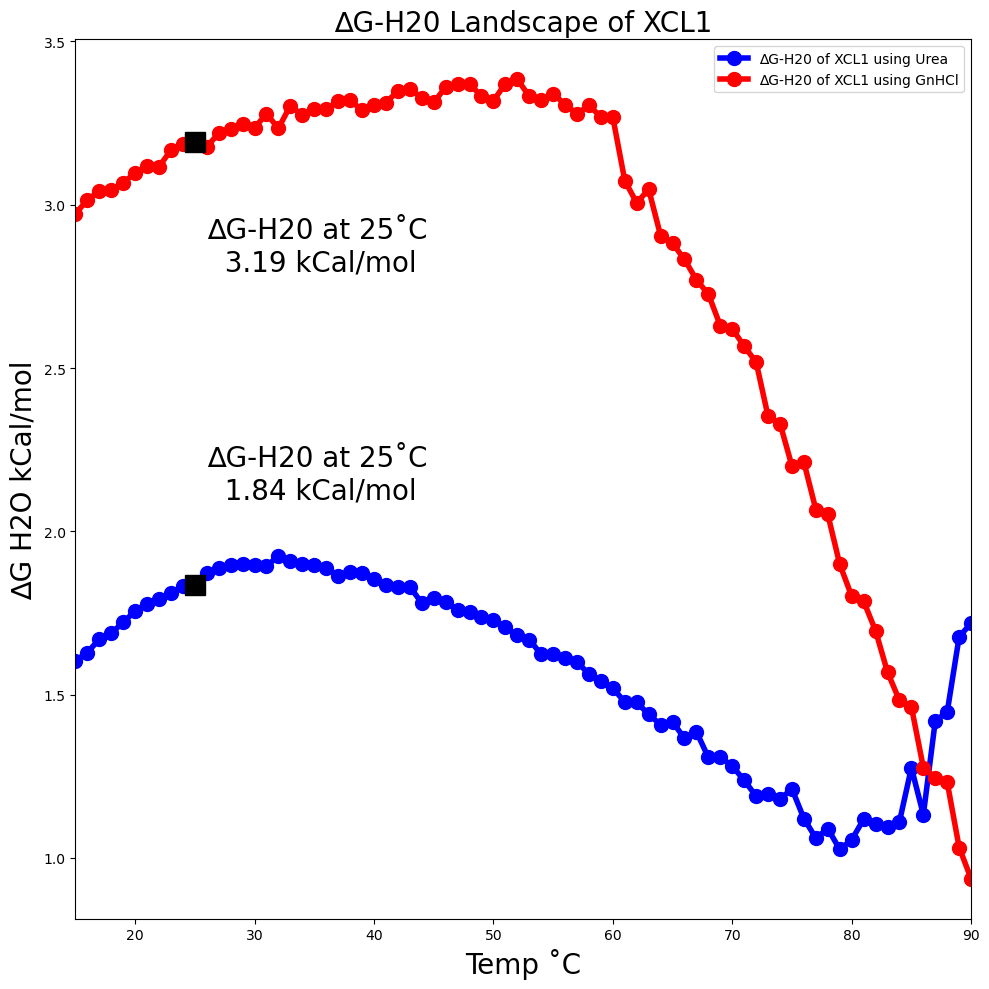

In [36]:
plt.figure(figsize=(10,10))

plt.plot(temp, inter, label = "∆G-H20 of XCL1 using Urea", ls = '-', linewidth = 4, marker = 'o', ms = 10, color = 'blue')
plt.plot(Gntemp, Gninter, label = "∆G-H20 of XCL1 using GnHCl", ls = '-', linewidth = 4, marker = 'o', ms = 10, color = 'red')
plt.plot(25, inter[10], 'ks', ms = 15)
plt.plot(25, Gninter[10], 'ks', ms = 15)
plt.text(x = 26, y = 2.10, s = '∆G-H20 at 25˚C\n  ' + str(round(inter[10], 2)) + ' kCal/mol', size = 20)
plt.text(x = 26, y = 2.80, s = '∆G-H20 at 25˚C\n  ' + str(round(Gninter[10], 2)) + ' kCal/mol', size = 20)



plt.title('∆G-H20 Landscape of XCL1', size = 20)
plt.xlabel('Temp ˚C', size = 20)
plt.ylabel('∆G H2O kCal/mol', size = 20)
plt.legend()
plt.xlim(15, 90)
#plt.ylim(1.8, 3.5)
plt.savefig('./XCL1_dGH2O_landscape.png')